In [1]:
#importing libraries
#importing libraries
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
from keras.layers import Conv2D, Activation, MaxPooling2D,Flatten,Dense
from keras.callbacks import ModelCheckpoint
import pandas as pd

In [3]:
#loading data
x_train = pd.read_csv("archive\Arabic Handwritten Digits Dataset CSV\csvTrainImages 60k x 784.csv",dtype='uint8')
y_train = pd.read_csv("archive\Arabic Handwritten Digits Dataset CSV\csvTrainLabel 60k x 1.csv",dtype='uint8')

In [25]:
x_train.shape

(59999, 28, 28)

In [ ]:
#to checkpoint the session
import dill
dill.dump_session("1.db")

In [7]:
x_train = np.array(x_train).reshape(59999,28,28)

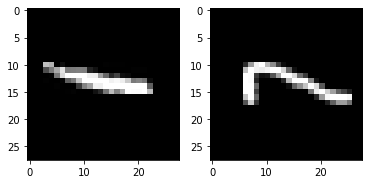

In [24]:
f,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(x_train[0],cmap = 'gray')
ax2.imshow(x_train[1],cmap = 'gray')

In [27]:
#structuring the model
def cnn():
    model = keras.models.Sequential()
    model.add(Conv2D(64,(3,3),input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(64,(2,2),strides = (2,2) ))
    
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(16,(2,2),strides = (2,2) ))
    
    model.add(Flatten())
    
    model.add(Dense( 10))
    model.add(Activation('softmax'))
    
    model.compile(optimizer = 'adam',
                 loss = keras.losses.SparseCategoricalCrossentropy(),
                 metrics = ["accuracy"])
    return model

In [29]:
x_train = x_train.reshape(-1,28,28,1)

In [30]:
model = cnn()

In [31]:
#builing a checkpoint fot picking the best model in case of convergence
checkpointer = ModelCheckpoint(filepath='bestt_model.hdf5', 
                               verbose=1, save_best_only=True)
model.fit(x_train,y_train,epochs=2, batch_size=128, verbose=1)

Epoch 1/2
469/469 [==============================] - 259s 553ms/step - loss: 0.3259 - accuracy: 0.9419
Epoch 2/2
128/469 [=======>......................] - ETA: 3:29 - loss: 0.0570 - accuracy: 0.9838

KeyboardInterrupt: 

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        16448     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 16)          2064      
_________________________________________________________________
flatten (Flatten)            (None, 400)              

In [36]:
x_test = np.array(pd.read_csv("archive\Arabic Handwritten Digits Dataset CSV\csvTestImages 10k x 784.csv",dtype='uint8'))
y_test = np.array(pd.read_csv("archive\Arabic Handwritten Digits Dataset CSV\csvTestLabel 10k x 1.csv",dtype='uint8'))

In [41]:
x_test = x_test.reshape(-1,28,28,1)

In [42]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 18s 56ms/step - loss: 0.0857 - accuracy: 0.97592s - loss: 0.0799 - accuracy: 0. - E


[0.08567685633897781, 0.9758976101875305]